## **决策树**

决策树(dicision tree) 是一个基于树形结构的算法, 根据一系列条件判断, 逐步去划分数据, 缩小范围, 最终得出预测结果, 决策树由四部分组成.

- 根节点: 包含所有数据
- 内部节点: 表示特征上的判断条件
- 分支: 根据判断条件分出的路径
- 叶节点: 最终分类或回归的结果

决策树适用于需要规则化、可解释性和快速决策的场景，尤其在数据特征明确、样本量适中的情况下表现良好。在复杂任务中，它常作为基础模型，与集成学习结合（如随机森林、梯度提升树）以提升性能。

决策树的工作过程: 三个步骤.特征选择, 决策树的生成, 决策树剪枝

1. 如果特征的数量很多, 可以在决策树学习之前先进行特征选择, 只留下对数据集有分类能力的特征.

2. 学习的过程通常是递归的选择一个最优特征, 根据这个特征对数据集进行划分, 使得对各个子数据集有一个最好的分类.
   1. 首先构建一个根节点, 将所有的训练数据放在根节点

   2. 选择一个最优特征, 根据这个特征对当前数据集进行分类, 保证子数据集是一次最优分类
   3. 如果这些子集已经能够被基本正确分类，那么构建叶结点，并将这些子集分到所对应的叶结点中去；如果还有子集不能被基本正确分类，那么就对这些子集选择新的最优特征，继续对其进行划分并构建相应的结点.
   4. 如此递归到所有训练集的子集被基本正确分类, 或者直到所有的特征都被用完.
3. 最后每个子集都被分类到一个叶子节点上, 这就生成了一颗决策树, 决策树中的每一次划分都相当于在特征空间中引入了一个超平面将空间一分为二.

以上方法生成的决策树可能对训练数据有很好的分类能力，但对未知的测试数据却未必，即可能发生过拟合现象。因此需要对已生成的树自下而上进行剪枝，将树变得更简单，从而使它具有更好的泛化能力。具体地，就是去掉过于细分的叶结点，使其回退到父结点或更高的结点，然后将父结点或更高的结点改为新的叶结点。

决策树生成考虑了局部最优, 剪枝考虑了全局最优

#### **信息熵**

信息熵是表示随机变量不确定性的度量.

假设X是一个取有限个离散值的随机变量, 其概率分布为P(X)

$$
P(X = x_i) = p_i,\quad i = 1,2,\ldots,n
$$

那么随机变量X的熵定义为:

$$
H(X) = - \sum_{i=1}^n p_i \log_2 p_i
$$

在 n = 2 的情况下X的概率分布为:

$$
P(X = 1) = p,\quad P(X = 0) = 1 - p
$$

此时X的信息熵为:
$$
H(X) = -p \log_2 p - (1 - p) \log_2 (1 - p)
$$

熵值只取决于X的概率分布, 不考虑X的取值.熵越大证明随机变量的混乱程度越厉害.不确定性越大

假设有随机变量(X, Y), 联合概率分布为:

$$
P(X = x_i, Y = y_j) = p_{ij} \quad i = 1,2,\ldots,n \quad j = 1,2,\ldots,m
$$

那么有条件熵 H(Y | X), 在已知X的情况下测量Y的不确定性.

$$
H(Y \mid X) = \sum_{i=1}^{n} P(X = x_i)\, H(Y \mid X = x_i)
$$

可以画出信息熵的图像

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
p = np.arange(0.01, 1, 0.01)
H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

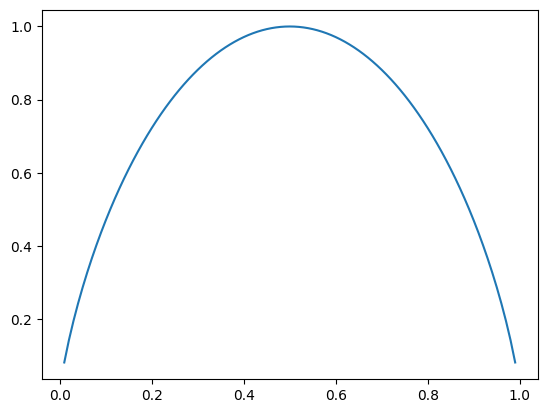

In [7]:
plt.plot(p, H)
plt.show()

#### **信息增益**

$$
g(D, A) = H(D) - H(D \mid A)
$$

就是判断根据当前特征对训练集的子集进行划分, 划分后集合的不确定性会减少多少, 那么我们一定希望不确定性越小越好, 也就是根据特征划分后的集合越确定越好, 即希望信息增益取得最大值.

#### **ID3算法**

ID3算法在决策树各个节点上应用信息增益选择特征，递归地构建决策树。具体方法是：从根节点开始，计算所有可能的信息增益，选择信息增益最大的特征作为节点特征，由该特征的不同取值建立子节点，再依次对子节点进行上述操作，直到所有特征信息增益均很小或无特征可选为止，最终生成一颗决策树。

#### **C4.5算法**

使用信息增益划分训练数据集的特征，会倾向于选择取值较多的特征。而使用信息增益率（Information Gain Ratio）可以对这一问题进行校正，这是特征选择的另一个准则.

信息增益率:
$$
g_r(D, A) = \frac{g(D, A)}{H(A)}
$$

C4.5算法与ID3算法相似, 但是使用信息增益率作为特征选择的标准.

#### **CART**

CART决策树是一棵二叉树，根据基尼指数生成决策树，对训练数据集D的每个特征A的每一个可能的取值a，计算A=a时的基尼指数，选择基尼指数最小的特征及其对应的切分点作为最优特征与最优切分点，并生成两个子节点，将训练数据集依特征分配到两个子节点中。重复上述过程，直到节点中样本数小于阈值、或样本集的基尼指数小于阈值、或没有个更多特征。